<a href="https://colab.research.google.com/github/DiyarWalaa/Waterqualitypredictionusing-ML/blob/main/waterqualitypredusing_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning project steps
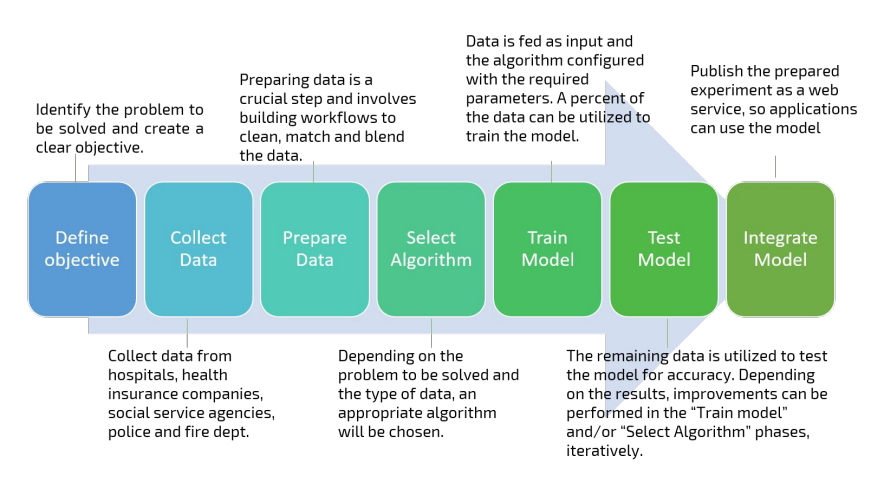

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, neighbors, metrics,tree,ensemble,svm

# Downloading Dataset

In [ ]:
!mkdir ~/.kaggle 
!cp /content/kaggle.json ~/.kaggle 
!chmod 600  ~/.kaggle/kaggle.json
!kaggle datasets download -d mssmartypants/water-quality

  0% 0.00/258k [00:00<?, ?B/s]
100% 258k/258k [00:00<00:00, 59.8MB/s]


In [ ]:
!unzip /content/water-quality.zip

Archive:  /content/water-quality.zip
  inflating: waterQuality1.csv       


In [ ]:
# Define a function to split our dataset into train/test splits using indices


def train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

# Read the Dataset

In [ ]:
dataset = pd.read_csv('/content/waterQuality1.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# Data Preprocessing

In [ ]:
dataset.ammonia.unique()

array(['9.08', '21.16', '14.02', ..., '2.78', '27.12', '10'], dtype=object)

In [ ]:
# Function to Convert The Data Type
def dtype_converter(x):
  try:
    x = float(x)
  except:
    x = None
  return x

In [ ]:
# Map Function to map the column values according to a function 
dataset.ammonia=dataset.ammonia.map(dtype_converter)

In [ ]:
# Map Function to map the column values according to a function 
dataset.is_safe=dataset.is_safe.map(dtype_converter)

In [ ]:
# show the inforamtion of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
#show the null values in each column
dataset.isna().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

In [ ]:
# drop the null values
dataset.dropna(inplace = True)

In [ ]:
# describe the data
dataset.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [ ]:
# we noticed that there are negative values in the ammonia column.we want to know how many negative values
(dataset.ammonia < 0).sum()

10

In [ ]:
# we drop the negative values, we have 10 negative values
dataset.drop(dataset[dataset['ammonia'] < 0].index,inplace = True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7986 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7986 non-null   float64
 1   ammonia      7986 non-null   float64
 2   arsenic      7986 non-null   float64
 3   barium       7986 non-null   float64
 4   cadmium      7986 non-null   float64
 5   chloramine   7986 non-null   float64
 6   chromium     7986 non-null   float64
 7   copper       7986 non-null   float64
 8   flouride     7986 non-null   float64
 9   bacteria     7986 non-null   float64
 10  viruses      7986 non-null   float64
 11  lead         7986 non-null   float64
 12  nitrates     7986 non-null   float64
 13  nitrites     7986 non-null   float64
 14  mercury      7986 non-null   float64
 15  perchlorate  7986 non-null   float64
 16  radium       7986 non-null   float64
 17  selenium     7986 non-null   float64
 18  silver       7986 non-null   float64
 19  uraniu

In [ ]:
# now we see that there are no negative values
dataset.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,...,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000,7986.000000
mean,0.665681,14.296141,0.161008,1.566062,0.042744,2.176069,0.247029,0.806018,0.771726,0.319500,...,0.099479,9.816521,1.329284,0.005190,16.463139,2.917437,0.049691,0.147646,0.044668,0.113949
std,1.265231,8.870009,0.252244,1.214996,0.036022,2.567149,0.270617,0.653397,0.435538,0.329427,...,0.058138,5.542970,0.573313,0.002967,17.694342,2.322175,0.028781,0.143522,0.026902,0.317770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.600000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.402500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.150000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.925000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.150000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.502500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [ ]:
# count how many samples for each class
dataset.is_safe.value_counts()
# imblanced dataset

0.0    7076
1.0     910
Name: is_safe, dtype: int64

0.0    7076
1.0     910
Name: is_safe, dtype: int64


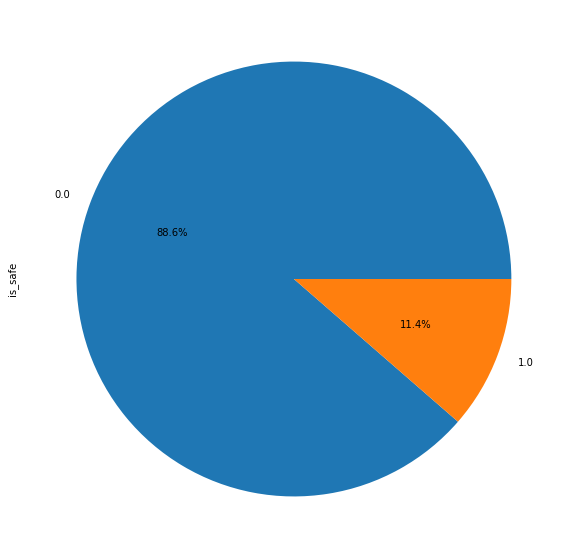

In [ ]:
# show the percentage of output classes
print(dataset.is_safe.value_counts())
dataset.is_safe.value_counts().plot.pie(figsize = (10,10),
                                        autopct = '%1.1f%%')

In [ ]:
# create new dataset the number of 1 equal to numbers of 0 (under sampling)
# create new _dataset of ones
new_dataset = dataset[dataset.is_safe == 1]
# append a random samples with same number of ones to the new_dataset
new_dataset = new_dataset.append(dataset[dataset.is_safe== 0 ].sample(n=910,random_state= 42))

In [ ]:
# now the model will work on balancing classes
new_dataset.is_safe.value_counts()

1.0    910
0.0    910
Name: is_safe, dtype: int64

In [ ]:
# prepare the input data and output
x = new_dataset.drop(columns = ['is_safe'])
y = new_dataset.is_safe

In [ ]:
# The StandardScaler is a method of standardizing data such the the transformed feature has 0 mean and and a standard deviation of 1.
x_normalizer = preprocessing.StandardScaler()
x_norm = x_normalizer.fit_transform(x)


# Modeling

# Alogorithms, Training and Testing the models

# KNN(see the slides)


 supervised and lazy learning method.It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set.

Let’s see how the KNN work shown in the figure below: 
•	Select the number K of the neighbors

•	Calculate the Euclidean distance of K number of neighbors.

•	Take the K nearest neighbors as per the calculated Euclidean distance.

•	Among these k neighbors, count the number of the data points in each category
.
•	Assign the new data points to that category for which the number of the neighbor is maximum.

•	Our model is ready.

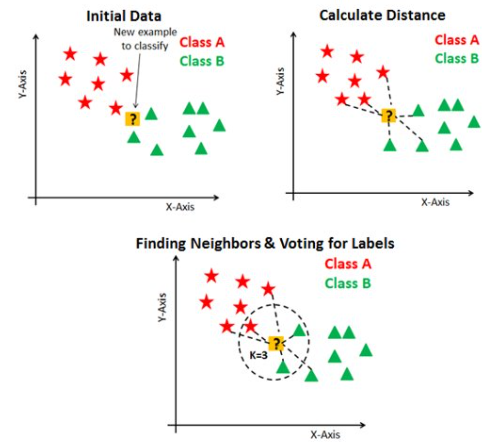

# Model Evaluation
Model evaluation metrics help us evaluate our model's accuracy and measure the performance of this trained model.
There are many ways for measuring classification performance Accuracy, Precision,Recall, F1 Score and confusion matrix.

**True Postive (TP):** classifier predicted TRUE (the water is safe) and the actual output was true also ( the water is safe)

**True Negative (TN):** when the model predicted FALSE (the water is not safe) and the actual output was False also (the water is not safe)

**False Postive (FP) (type  1 error):** Classifier predicted TRUE (the water is safe) but the actual output is FALSE (the water is not safe)

**False Neagative (FN) (type 2 error):** classifier predicted False (the water is not safe) but the actual output is TRUE (the water is safe)

**Accuracy:**simply measures how often the classifier correctly predicts. 

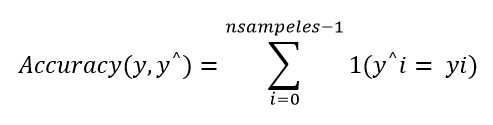

precision: Precision is useful in the cases where False Positive is a higher concern than False Negatives. 
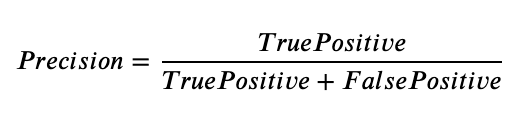

Recall:It is a useful metric in cases where False Negative is of higher concern than False Positive.
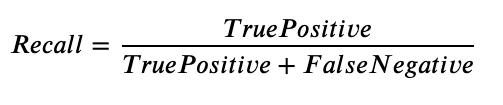

F1 Score — It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall.
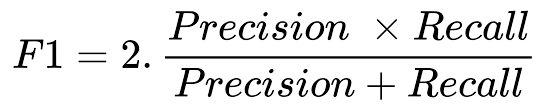

Confusion matrix:. It is a table with combinations of predicted and actual values.
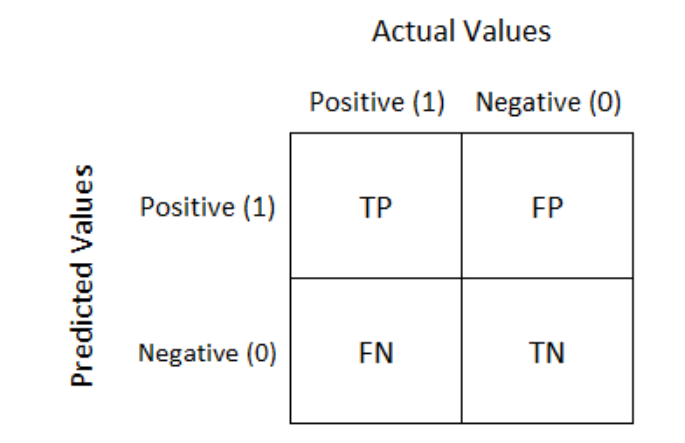






In [ ]:
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in stratified_shuffled_k_fold.split(x_norm, y): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x_norm, y.to_numpy(), train_indices, test_indices
    )

    # Train model
    model = neighbors.KNeighborsClassifier(n_neighbors=9)
    model.fit(x_train, y_train)
    # Predict using test set
    y_pred = model.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.857143,0.809524,0.934066,0.867347
1,0.879121,0.848485,0.923077,0.884211
2,0.813187,0.766355,0.901099,0.828283
3,0.879121,0.834951,0.945055,0.886598
4,0.862637,0.811321,0.945055,0.873096
5,0.862637,0.817308,0.934066,0.871795
6,0.824176,0.797980,0.868132,0.831579
7,0.824176,0.780952,0.901099,0.836735
8,0.818681,0.773585,0.901099,0.832487
9,0.813187,0.752212,0.934066,0.833333


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.843407
precision    0.799267
recall       0.918681
F1           0.854546
dtype: float64

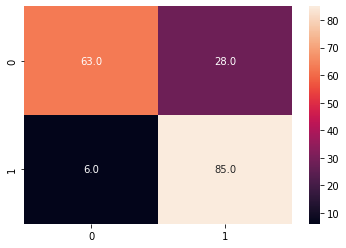

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt = ".1f")

# Decision Tree
The supervised learning algorithms family includes the decision tree algorithm. The decision tree technique, in contrast to other supervised learning methods, is capable of handling both classification and regression challenges.


In [ ]:
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in stratified_shuffled_k_fold.split(x, y): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x.to_numpy(), y.to_numpy(), train_indices, test_indices
    )

    # Train model
    model = tree.DecisionTreeClassifier(random_state=42,max_depth=6)
    model.fit(x_train, y_train)
    # Predict using test set
    y_pred = model.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.950549,0.936170,0.967033,0.951351
1,0.934066,0.943820,0.923077,0.933333
2,0.917582,0.904255,0.934066,0.918919
3,0.928571,0.914894,0.945055,0.929730
4,0.934066,0.943820,0.923077,0.933333
5,0.879121,0.848485,0.923077,0.884211
6,0.934066,0.934066,0.934066,0.934066
7,0.901099,0.884211,0.923077,0.903226
8,0.895604,0.860000,0.945055,0.900524
9,0.917582,0.880000,0.967033,0.921466


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.919231
precision    0.904972
recall       0.938462
F1           0.921016
dtype: float64

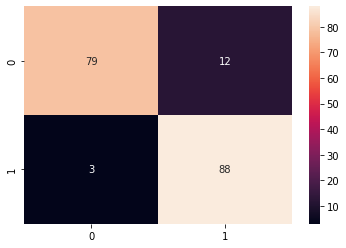

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

[Text(0.6145833333333334, 0.9285714285714286, 'X[4] <= 0.009\ngini = 0.5\nsamples = 1638\nvalue = [819, 819]'),
 Text(0.3314393939393939, 0.7857142857142857, 'X[0] <= 0.235\ngini = 0.347\nsamples = 816\nvalue = [182, 634]'),
 Text(0.1856060606060606, 0.6428571428571429, 'X[18] <= 0.115\ngini = 0.456\nsamples = 205\nvalue = [133, 72]'),
 Text(0.11363636363636363, 0.5, 'X[19] <= 0.045\ngini = 0.494\nsamples = 99\nvalue = [44, 55]'),
 Text(0.06060606060606061, 0.35714285714285715, 'X[5] <= 0.67\ngini = 0.364\nsamples = 67\nvalue = [16, 51]'),
 Text(0.030303030303030304, 0.21428571428571427, 'X[7] <= 0.51\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.015151515151515152, 0.07142857142857142, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.045454545454545456, 0.07142857142857142, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.09090909090909091, 0.21428571428571427, 'X[17] <= 0.075\ngini = 0.177\nsamples = 51\nvalue = [5, 46]'),
 Text(0.07575757575757576, 0.071428571428571

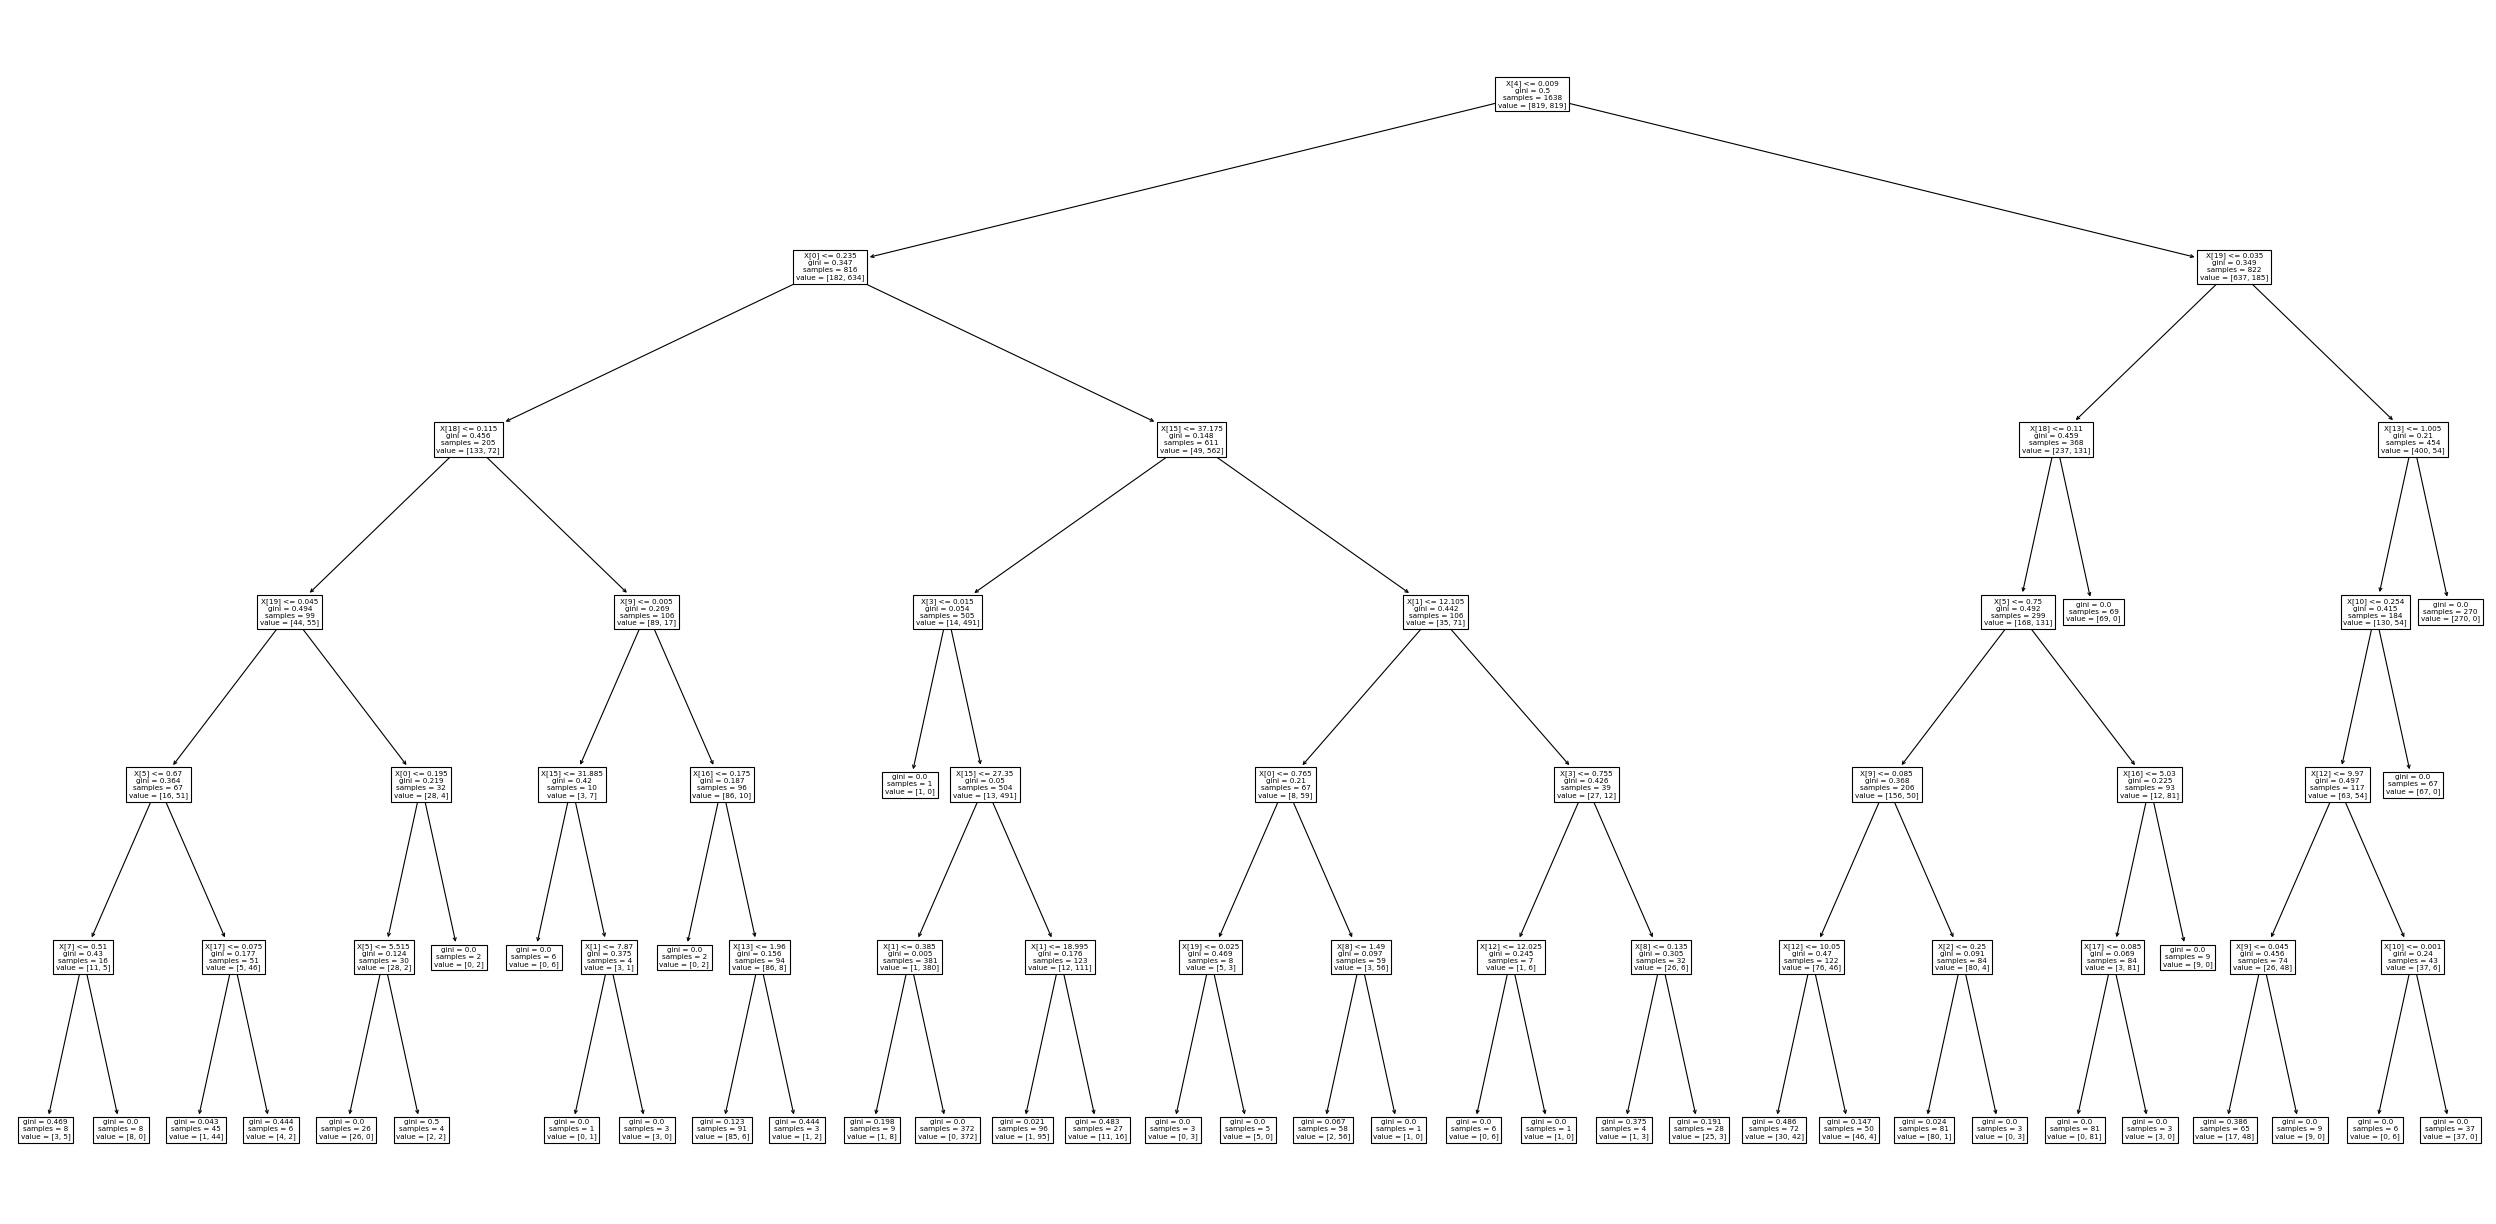

In [ ]:
plt.figure(figsize = (40,20),dpi =80)
tree.plot_tree(model)

# Random Forest


In [ ]:
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in stratified_shuffled_k_fold.split(x, y): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x.to_numpy(), y.to_numpy(), train_indices, test_indices
    )

    # Train model
    model =ensemble.RandomForestClassifier(n_estimators=100,random_state=42)
    model.fit(x_train, y_train)
    # Predict using test set
    y_pred = model.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.934066,0.934066,0.934066,0.934066
1,0.961538,0.988372,0.934066,0.960452
2,0.934066,0.907216,0.967033,0.936170
3,0.956044,0.946237,0.967033,0.956522
4,0.928571,0.933333,0.923077,0.928177
5,0.945055,0.945055,0.945055,0.945055
6,0.950549,0.955556,0.945055,0.950276
7,0.923077,0.923077,0.923077,0.923077
8,0.945055,0.935484,0.956044,0.945652
9,0.939560,0.916667,0.967033,0.941176


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.941758
precision    0.938506
recall       0.946154
F1           0.942062
dtype: float64

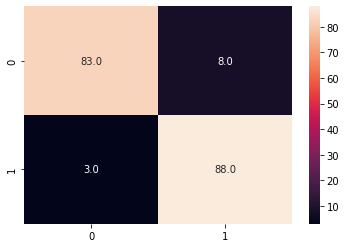

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt = ".1f")

# SVM


In [ ]:
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 

# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in stratified_shuffled_k_fold.split(x_norm, y): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        x_norm, y.to_numpy(), train_indices, test_indices)

    # Train model
    svc = svm.SVC(random_state=42)
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

,accuracy,precision,recall,F1
0,0.851648,0.826531,0.890110,0.857143
1,0.901099,0.901099,0.901099,0.901099
2,0.868132,0.838384,0.912088,0.873684
3,0.890110,0.851485,0.945055,0.895833
4,0.873626,0.846939,0.912088,0.878307
5,0.901099,0.901099,0.901099,0.901099
6,0.879121,0.879121,0.879121,0.879121
7,0.851648,0.833333,0.879121,0.855615
8,0.857143,0.828283,0.901099,0.863158
9,0.851648,0.820000,0.901099,0.858639


In [ ]:
# Calculate the mean of the scores
scores_df.mean()

accuracy     0.872527
precision    0.852627
recall       0.902198
F1           0.876370
dtype: float64

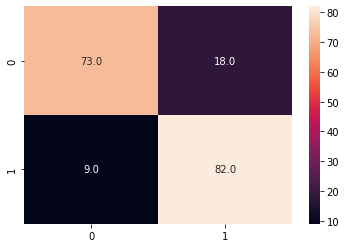

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt = ".1f")